In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_mutual_info_score

# for better plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
%matplotlib inline

In [3]:
# read dada1.csv in python with Pandas
data = pd.read_csv('cluster-data.csv', header=0)

# convert the datas in numpy-array 
X = data.as_matrix(columns=None)

# y is the expected
labels = pd.read_csv('cluster-data-class.csv', header=0)
y = labels.as_matrix(columns=None)
y = np.ravel(y)
print('type y: ',type(y))
print('Formato X: {}'.format(X.shape))
print('Formato y: {}'.format(y.shape))

type y:  <class 'numpy.ndarray'>
Formato X: (5417, 3)
Formato y: (5417,)


# Rode o kmeans nos dados, com numero de restarts = 5 

Mutal information 0.4894164298009129
For n_clusters = 5 The average silhouette_score is : 0.499393862409


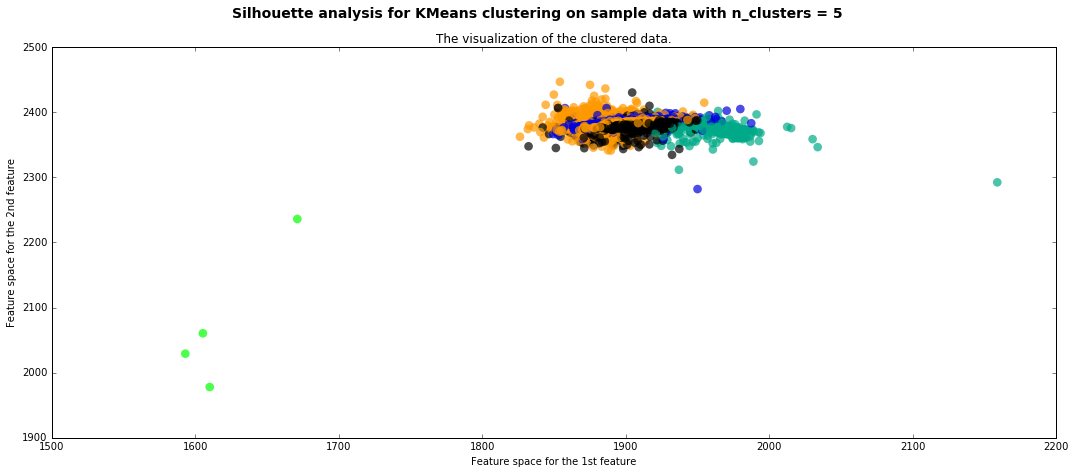

In [18]:
for n_clusters in range(5, 6):
    fig, ax2 = plt.subplots(1)
    fig.set_size_inches(18,7)
    # The 1st subplot is the silhouette plot The silhouette coefficient can range from
    # -1, 1 but in this example all lie within [-0.1, 1]
    
#     ax1.set_xlim([0.01, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X)])
    
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=5, n_init=5)
    cluster_labels = clusterer.fit_predict(X)
    metrics = adjusted_mutual_info_score(y, cluster_labels)
    print('Mutal information {}'.format(metrics))
    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

#         color = cm.spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#################################################################################
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], marker='.', s=300, lw=0, alpha=0.7, c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=150)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    

    plt.show()
    


    

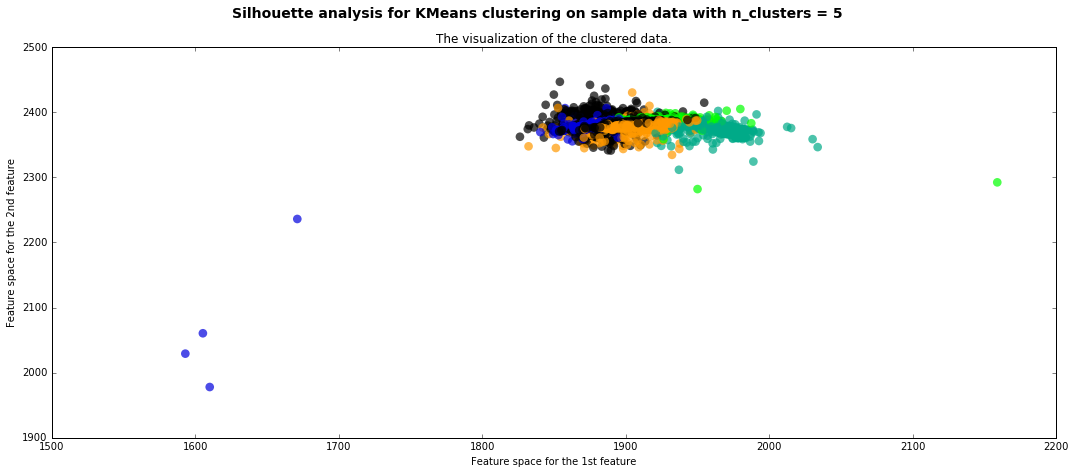

In [20]:
fig, ax2 = plt.subplots(1)
fig.set_size_inches(18,7)
clusterer = KMeans(n_clusters=5, n_init=5)
cluster_labels = clusterer.fit_predict(X)
colors = cm.spectral(cluster_labels.astype(float)/5)
ax2.scatter(X[:,0], X[:,1], marker='.', s=300, lw=0, alpha=0.7, c=colors)
centers = clusterer.cluster_centers_
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data " \
              "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
    
plt.show()
    


    